In [1]:
from networkx_graph import RepresentativesGraph
import networkx as nx # Para redes en general
from networkx.readwrite import json_graph
from dispa import DisparityFilter2
from procesador_votaciones import ProcesadorDeVotaciones
from heavy_graph_maker import HeavyGraphMaker

import matplotlib.pylab as plt # Para graficar networkx y demases
import matplotlib.cm as cm # para mapas de colores
import numpy as np
from sklearn.metrics import normalized_mutual_info_score as mis # Función para calcular información mutua
import cairo # Importo Cairo
import funciones as f


In [2]:
year = 2018
procesador = ProcesadorDeVotaciones(year,year+1, 'data')
congress = procesador.procesar()
maker = HeavyGraphMaker(congress)
red = maker.create_year_network(year)
red_nx = red.graph
nodos = red_nx.edges()
print(len(nodos))

#red_igraph = ig.Graph.TupleList(red.edges(), directed=False)


Loading from data/2018/1
Loading from data/2018/2
Loading from data/2018/3
Loading from data/2018/4
Loading from data/2018/5
Loading from data/2018/6
Loading from data/2018/7
Loading from data/2018/8
Loading from data/2018/9
Loading from data/2018/10
Loading from data/2018/11
Loading from data/2018/12
Loading from data/2019/1
Loading from data/2019/2
Loading from data/2019/3
Loading from data/2019/4
Loading from data/2019/5
Loading from data/2019/6
Loading from data/2019/7
Loading from data/2019/8
Loading from data/2019/9
Loading from data/2019/10
Loading from data/2019/11
Loading from data/2019/12
(2018,)
2018
<class 'int'>
33411


In [3]:
disp_filt = DisparityFilter2(red_nx)
grafo_cortado = disp_filt.disparity_filter_alpha_cut(alpha_t=0.3)

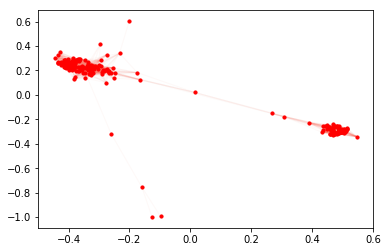

In [5]:
pos = nx.spring_layout(grafo_cortado)
nx.draw_networkx_nodes(grafo_cortado, pos, node_color='red',  with_labels=False, node_size=10, cmap=plt.cm.jet)
nx.draw_networkx_edges(grafo_cortado, pos, alpha=0.05,edge_color = 'salmon')

In [17]:
red = grafo_cortado
print(len(red.edges()))
print(f'la cantidad de nodos en la componente gigante es {len(list(nx.connected_component_subgraphs(red))[0])}')

11575
la cantidad de nodos en la componente gigante es 254


{<party.Party object at 0x000001BA54B9A048>: 0, <party.Party object at 0x000001BA54B8B0F0>: 1, <party.Party object at 0x000001BA54FC60F0>: 2, <party.Party object at 0x000001BA552270F0>: 3, <party.Party object at 0x000001BA54B8B940>: 4, <party.Party object at 0x000001BA54B8B160>: 5, <party.Party object at 0x000001BA54BA9978>: 6, <party.Party object at 0x000001BA54B8B9E8>: 7, <party.Party object at 0x000001BA54B8B208>: 8, <party.Party object at 0x000001BA551D4208>: 9, <party.Party object at 0x000001BA54B9AA20>: 10, <party.Party object at 0x000001BA54B8B2B0>: 11, <party.Party object at 0x000001BA54BA92E8>: 12, <party.Party object at 0x000001BA54BBBB00>: 13, <party.Party object at 0x000001BA54B9AB38>: 14, <party.Party object at 0x000001BA54B8BC18>: 15, <party.Party object at 0x000001BA54B8B4A8>: 16, <party.Party object at 0x000001BA54BA9CC0>: 17, <party.Party object at 0x000001BA54BA94E0>: 18, <party.Party object at 0x000001BA54B9ACF8>: 19, <party.Party object at 0x000001BA54BBB518>: 20, <

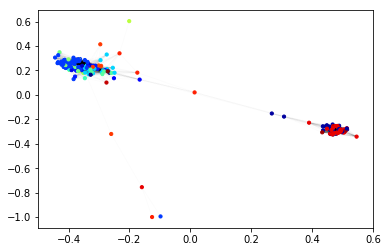

In [20]:
red = grafo_cortado
nodes = list(red.nodes())
grupos = [list(n.parties[2018])[0] for i,n in enumerate(nodes)]
    #groups = set([gr.text for gr in list(grupos])
mapping = dict(zip((set(grupos)),count()))
print(mapping)
colors = [mapping[grupos[i]] for i,n in enumerate(nodes)]
    
    # drawing nodes and edges separately so we can capture collection for colobar
ec = nx.draw_networkx_edges(red, pos,alpha=0.01)
nc = nx.draw_networkx_nodes(red, pos, nodelist=nodes, node_color=colors, with_labels=False, node_size=10, cmap=plt.cm.jet)
    

No handles with labels found to put in legend.


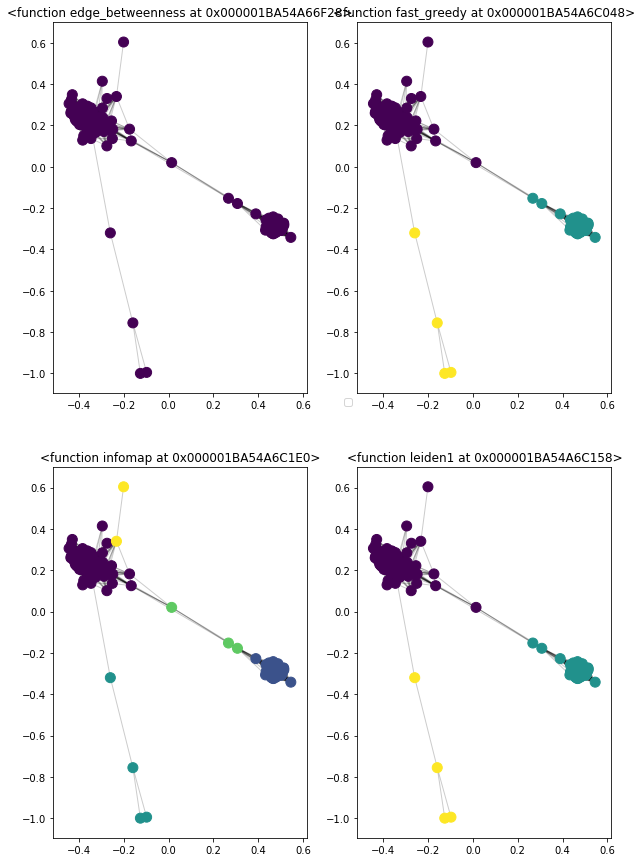

In [16]:
array_funciones = [f.edge_betweenness,f.fast_greedy,f.infomap,f.leiden1]
weight = []
for e in red.edges():
    red[e[0]][e[1]]['weight'] = red[e[0]][e[1]]['weight'] + 105
    weight.append(red[e[0]][e[1]]['weight'])
fig, axs = plt.subplots(2,2, figsize=(15,10))
axs = axs.flatten()
#f. tight_layout(pad=3.0)

for i,metodo in enumerate(array_funciones):
    particion = metodo(red,weight)
    colores = f.colores_hex(max(particion.values())+1) #funcion que devuelve n colores

    #nx.draw(Red_delfines, node_size= 100, ax = axs[i], node_color = node_color,pos=posiciones, node_shape = aShape,  nodelist = node_list)
    nx.draw_networkx_nodes(red,node_size= 10, ax = axs[i], node_color=list(particion.values()),nodelist = list(particion.keys()),pos=pos)
    nx.draw_networkx_edges(red, ax = axs[i], width=1.0, alpha=0.01,pos=pos)
    axs[i].set_title(metodo)
plt.legend(bbox_to_anchor=(0, 1.2))
plt.show()